In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('HomeWork.csv',index_col=0)
df.head()

status  income   age        date
0    Student  4000.0  18.0  2022-01-23
1  Pensioner     NaN  91.0  2022-01-19
2    Student  4000.0  18.0  2022-01-03
3    Student     0.0   NaN  2022-01-13
4  Pensioner  5000.0  87.0  2022-01-31

In [5]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [6]:
df.dtypes

status            object
income           float64
age              float64
date      datetime64[ns]
dtype: object

In [7]:
df.describe()

income         age                           date
count     430.000000  441.000000                            500
mean   152020.623256   46.362812  2022-01-16 05:48:28.800000256
min    -13745.000000    0.000000            2022-01-01 00:00:00
25%      2000.000000   23.000000            2022-01-09 00:00:00
50%     21000.000000   44.000000            2022-01-16 00:00:00
75%    217000.000000   68.000000            2022-01-24 00:00:00
max    992000.000000   99.000000            2022-02-01 00:00:00
std    242647.036978   25.036517                            NaN

## Графики

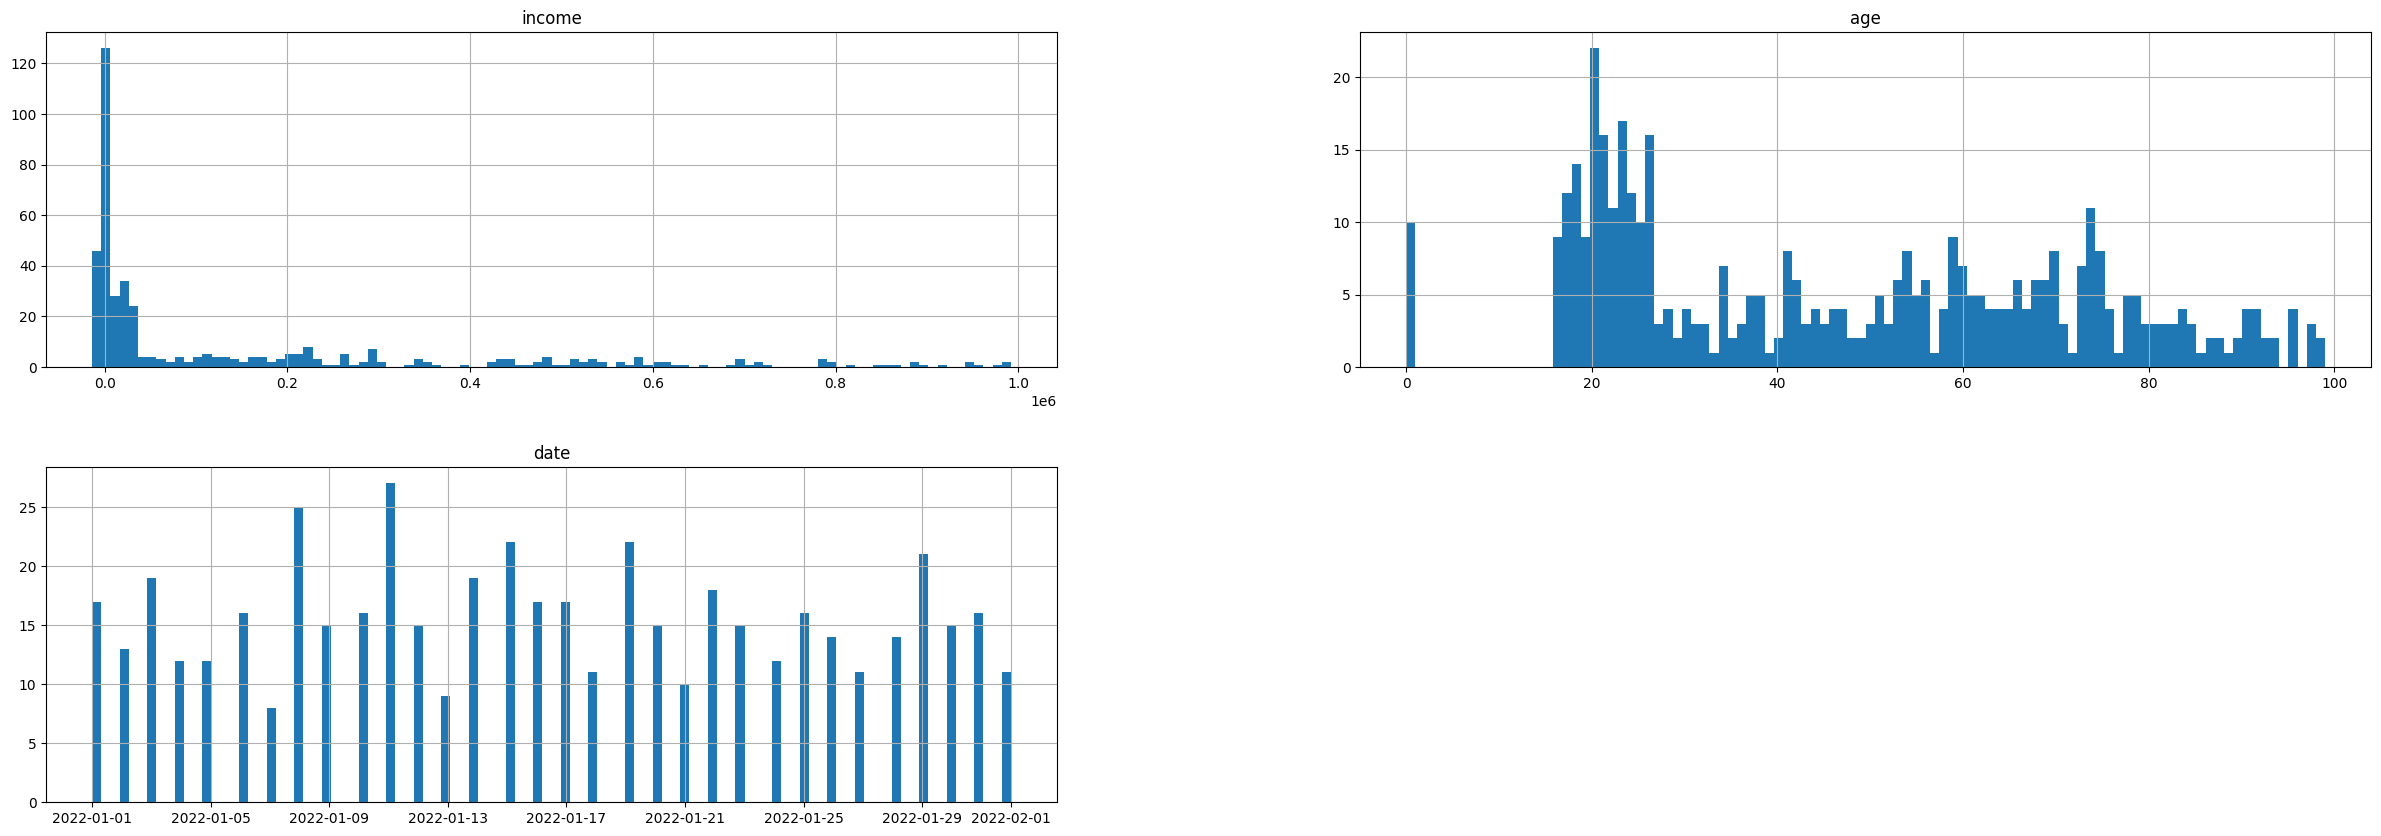

In [8]:
#Гистограммы
df.hist(figsize=(30,10),bins=100)
plt.show()

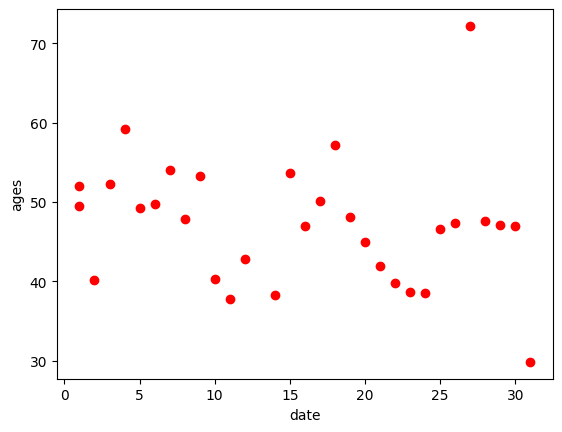

In [9]:
#Scatterplot 
age_df = pd.DataFrame()
age_df['age'] = df.resample('1d', on='date')['age'].mean()
age_df.reset_index(inplace=True)

plt.xlabel('date')
plt.ylabel('ages')
plt.scatter(age_df['date'].dt.day,age_df['age'],c='r')

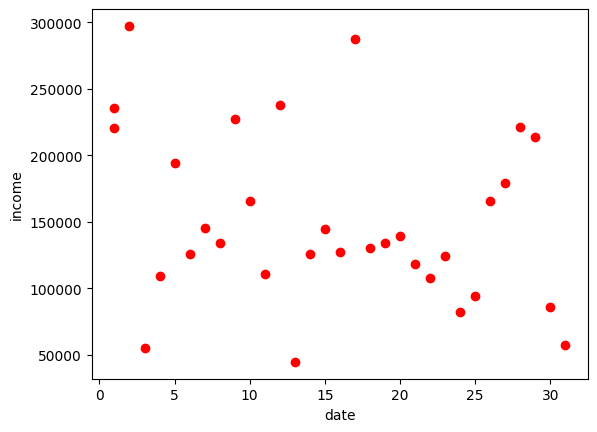

In [10]:
income_df = pd.DataFrame()
income_df['income'] = df.resample('1d', on='date')['income'].mean()
income_df.reset_index(inplace=True)

plt.xlabel('date')
plt.ylabel('income')
plt.scatter(income_df['date'].dt.day,income_df['income'],c='r')

<Axes: title={'center': 'group'}, xlabel='date'>

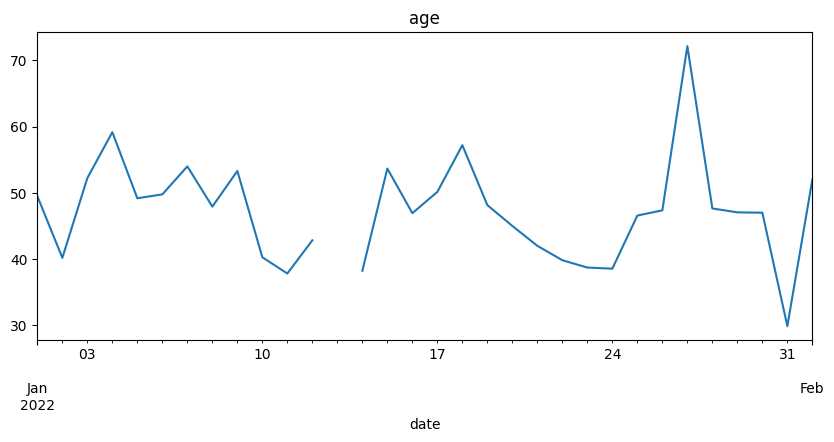

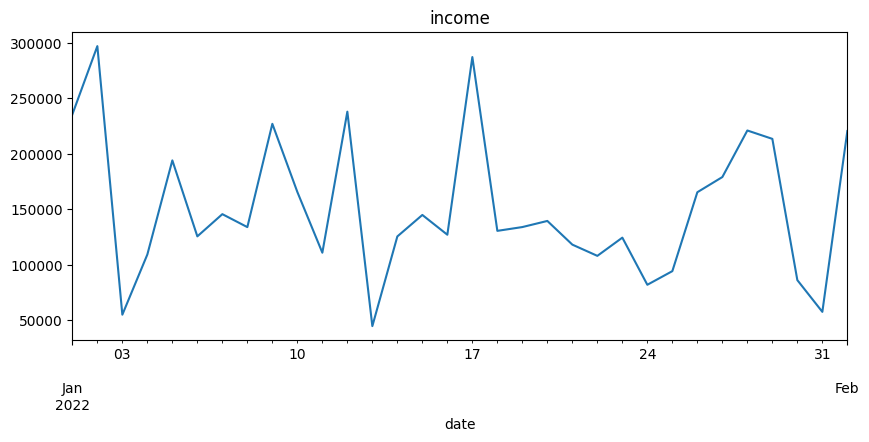

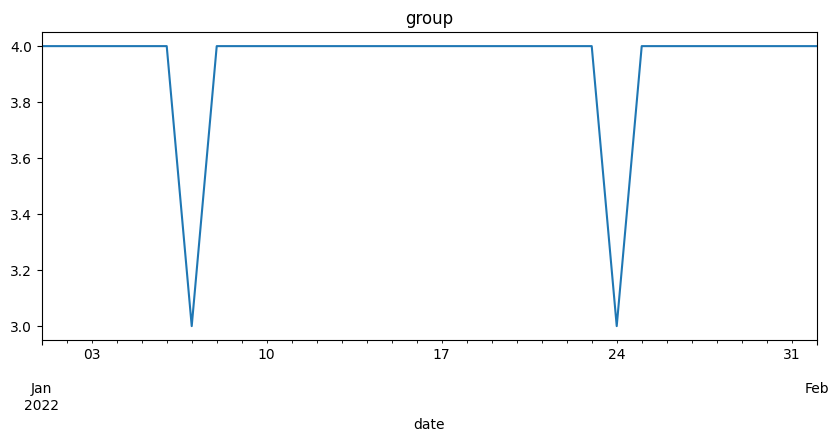

In [11]:
#resample
plt.figure(figsize=(10, 4))
df.resample('1d', on='date')['age'].mean().plot(title = 'age')
plt.figure(figsize=(10, 4))
df.resample('1d', on='date')['income'].mean().plot(title = 'income')
plt.figure(figsize=(10, 4))
df.resample('1d', on='date')['status'].nunique().plot(title = 'group')

In [12]:
#Видим, что 13 января возрасты не заполнены
df.loc[df['date'].dt.day == 13]

status    income  age       date
3        Student       0.0  NaN 2022-01-13
126    Pensioner   29000.0  NaN 2022-01-13
128      Student    2000.0  NaN 2022-01-13
143  Businessman  169000.0  NaN 2022-01-13
215      Working  110000.0  NaN 2022-01-13
271      Student    2000.0  NaN 2022-01-13
278    Pensioner       NaN  NaN 2022-01-13
349      Student    1000.0  NaN 2022-01-13
470      Student       NaN  NaN 2022-01-13

In [13]:
#27-го числа пришли одни деды
df.loc[df['date'].dt.day == 27]

status    income   age       date
31   Businessman  236000.0  72.0 2022-01-27
75     Pensioner   29000.0  91.0 2022-01-27
100  Businessman  581000.0  78.0 2022-01-27
123    Pensioner    9000.0  76.0 2022-01-27
193      Working  291000.0   NaN 2022-01-27
213      Student       NaN   NaN 2022-01-27
239  Businessman  442000.0  32.0 2022-01-27
274    Pensioner   14000.0  84.0 2022-01-27
371    Pensioner   20000.0   NaN 2022-01-27
440    Pensioner   -9709.0   NaN 2022-01-27
466      Student       NaN   NaN 2022-01-27

<Axes: xlabel='age'>

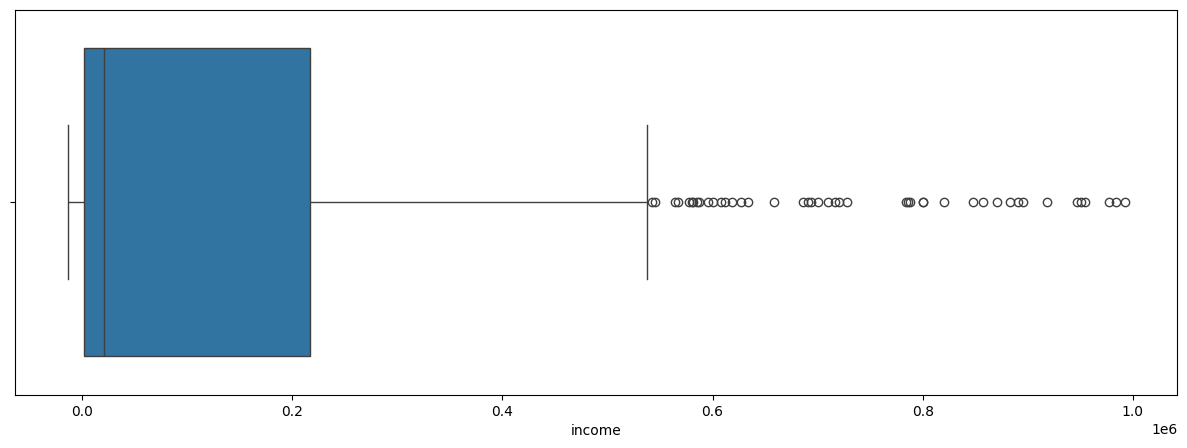

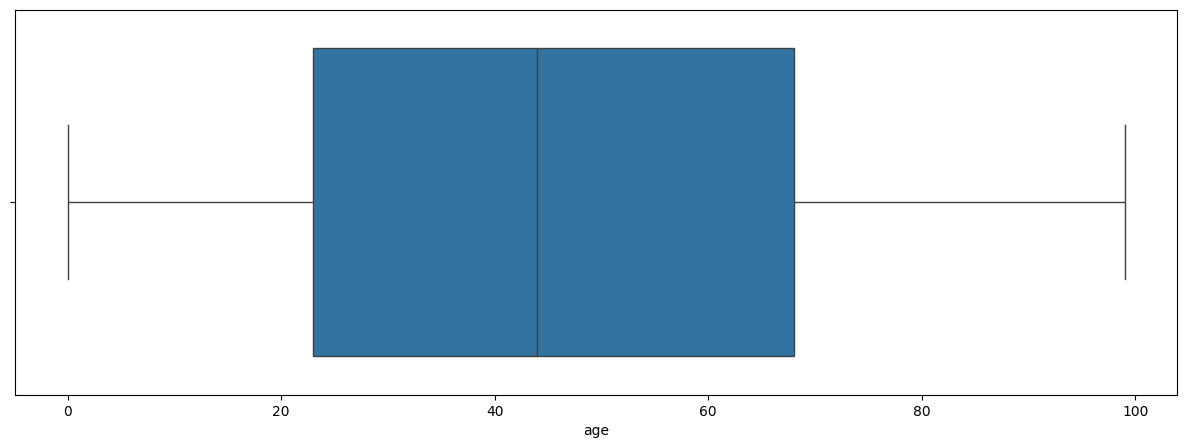

In [14]:
#boxplots
plt.figure(figsize=(15,5))
sns.boxplot(x=df['income'])

plt.figure(figsize=(15,5))
sns.boxplot(x=df['age'])

In [15]:
df['status'].value_counts()

status
Student        145
Businessman    135
Pensioner      112
Working         98
Name: count, dtype: int64

## Видим, что есть 0 в возрасте и отрицательный доход, это явные ошибочные данные, заменим их на nan

In [16]:
df[(df.age<18)][['status','income','age']].value_counts().sort_index()

status       income     age 
Businessman  -8212.0    0.0     1
              168000.0  0.0     1
              344000.0  0.0     1
Student      -9135.0    17.0    1
             -1600.0    17.0    1
              0.0       0.0     2
                        16.0    1
              1000.0    16.0    3
                        17.0    3
              2000.0    17.0    1
              3000.0    0.0     1
                        16.0    2
                        17.0    1
              4000.0    16.0    1
                        17.0    3
              5000.0    0.0     1
                        16.0    1
Working       167000.0  0.0     1
Name: count, dtype: int64

In [17]:
#16 и 17 - нормальные значения (в этом возрасте выдают кредиты? О_о), видим, что это студенты. Поэтому заменим только нули
df['age'] = df['age'].replace(0,np.nan)

In [18]:
df['age'].describe()

count    431.000000
mean      47.438515
std       24.295187
min       16.000000
25%       23.000000
50%       45.000000
75%       68.000000
max       99.000000
Name: age, dtype: float64

In [19]:
#Доход меньше нуля заменим на nan
df.loc[df['income']<0,'income'] = np.nan


In [20]:
df['income'].describe()

count       371.000000
mean     177460.916442
std      252059.860883
min           0.000000
25%        4000.000000
50%       28000.000000
75%      260500.000000
max      992000.000000
Name: income, dtype: float64

<Axes: xlabel='income'>

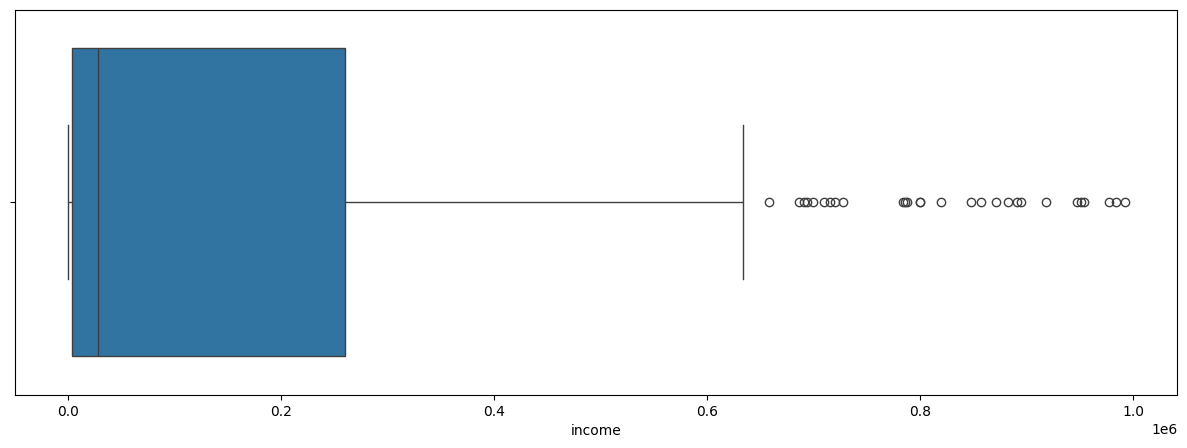

In [21]:
#Посмотрим снова boxplot для дохода
plt.figure(figsize=(15,5))
sns.boxplot(x=df['income'])

In [22]:
a = df['income'].quantile(0.75)
b = df['income'].quantile(0.25)
IQR = a - b


In [23]:
max_income = a + (a-b)*1.5

In [24]:
df[(df.income>max_income)][['status','income','age']].value_counts().sort_index()

status       income    age 
Businessman  658000.0  73.0    1
             686000.0  80.0    1
             700000.0  30.0    1
             710000.0  50.0    1
             716000.0  73.0    1
             720000.0  75.0    1
             728000.0  30.0    1
             784000.0  61.0    1
             788000.0  31.0    1
             800000.0  18.0    1
                       53.0    1
             820000.0  80.0    1
             848000.0  27.0    1
             857000.0  60.0    1
             871000.0  79.0    1
             891000.0  68.0    1
             918000.0  68.0    1
             947000.0  71.0    1
             951000.0  55.0    1
             954000.0  26.0    1
             977000.0  79.0    1
             992000.0  53.0    1
Name: count, dtype: int64

In [25]:
#Поскольку это реальные значения, и я не знаю зависимость таргета от категории, приводить к медиане нехорошо. Заменим на конец интервала
df.loc[df['income']>max_income,'income'] = max_income

In [26]:
df['income'].describe()

count       371.000000
mean     164032.345013
std      218071.364230
min           0.000000
25%        4000.000000
50%       28000.000000
75%      260500.000000
max      645250.000000
Name: income, dtype: float64

<Axes: xlabel='age'>

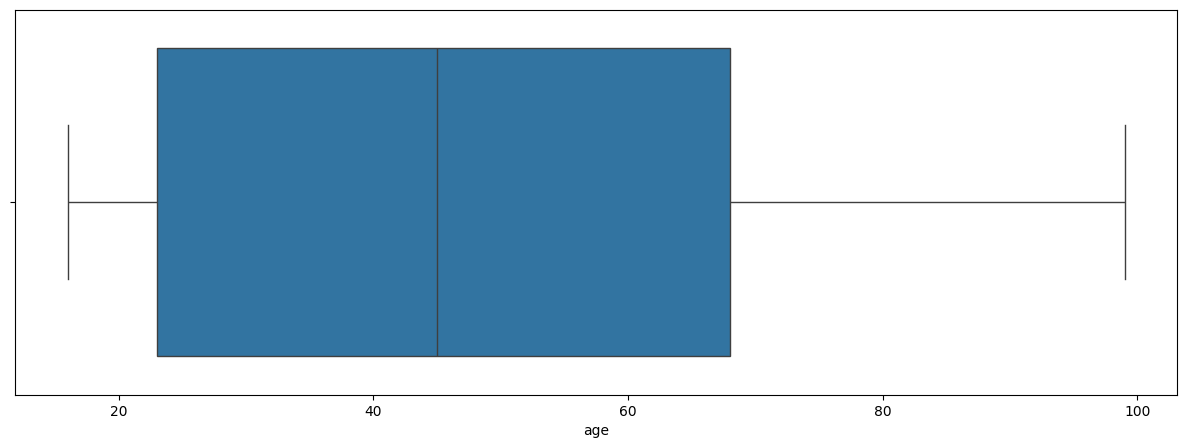

In [27]:
#снова глянем boxplot
plt.figure(figsize=(15,5))
sns.boxplot(x=df['age'])

## С выбросами разобрались. Теперь рассмотрим NaN

In [28]:
df.isna().sum()

status     10
income    129
age        69
date        0
dtype: int64

In [29]:
#Сразу удалю строчки, где 2 и больше пропусков
to_drop = df.loc[((df['age'].isna())&(df['income'].isna()))|((df['age'].isna())&(df['status'].isna()))
                 |((df['income'].isna())&(df['status'].isna()))]

In [30]:
to_drop

status   income   age       date
65           NaN      NaN  76.0 2022-01-10
81   Businessman      NaN   NaN 2022-01-10
167  Businessman      NaN   NaN 2022-01-22
168      Student      NaN   NaN 2022-01-15
199      Student      NaN   NaN 2022-01-06
210    Pensioner      NaN   NaN 2022-01-25
213      Student      NaN   NaN 2022-01-27
278    Pensioner      NaN   NaN 2022-01-13
296  Businessman      NaN   NaN 2022-01-09
298  Businessman      NaN   NaN 2022-01-12
318  Businessman      NaN   NaN 2022-01-20
319    Pensioner      NaN   NaN 2022-01-19
327      Student      NaN   NaN 2022-01-03
351      Student      NaN   NaN 2022-01-20
355    Pensioner      NaN   NaN 2022-01-31
359          NaN  30000.0   NaN 2022-01-05
376          NaN      NaN  81.0 2022-01-12
378          NaN      NaN  16.0 2022-01-22
385      Student      NaN   NaN 2022-01-23
411  Businessman      NaN   NaN 2022-01-19
440    Pensioner      NaN   NaN 2022-01-27
466      Student      NaN   NaN 2022-01-27
470      Student      NaN   NaN 2022-01-13

In [31]:
df.drop(to_drop.index,axis=0,inplace=True)

In [32]:
df.reset_index(inplace=True)

In [33]:
df.drop(labels='index',axis=1,inplace=True)

# Status

In [34]:
#В колонке status мало пропусков, но их можно посмотреть и заполнить
df.loc[df['status'].isna()]

status    income   age       date
35     NaN  286000.0  53.0 2022-01-30
81     NaN  262000.0  35.0 2022-01-19
165    NaN    9000.0  85.0 2022-01-19
193    NaN  169000.0  59.0 2022-01-17
364    NaN   79000.0  24.0 2022-01-22
446    NaN  645250.0  54.0 2022-01-10

In [35]:
#c этими ребятами все понятно
df['status'].loc[165] = 'Pensioner'
df['status'].loc[364] = 'Working'
df['status'].loc[446] = 'Businessman'


In [36]:
df.groupby(['status'])['income'].median()

status
Businessman    512000.0
Pensioner       18000.0
Student          2000.0
Working        154000.0
Name: income, dtype: float64

In [37]:
df_buisness = df.loc[df['status']=='Businessman']
df_buisness.groupby(['date'])['status'].value_counts()

date        status     
2022-01-01  Businessman    5
2022-01-02  Businessman    7
2022-01-03  Businessman    4
2022-01-04  Businessman    3
2022-01-05  Businessman    4
2022-01-06  Businessman    2
2022-01-07  Businessman    2
2022-01-08  Businessman    3
2022-01-09  Businessman    5
2022-01-10  Businessman    5
2022-01-11  Businessman    7
2022-01-12  Businessman    5
2022-01-13  Businessman    1
2022-01-14  Businessman    3
2022-01-15  Businessman    5
2022-01-16  Businessman    3
2022-01-17  Businessman    7
2022-01-18  Businessman    3
2022-01-19  Businessman    3
2022-01-20  Businessman    5
2022-01-21  Businessman    4
2022-01-22  Businessman    2
2022-01-23  Businessman    2
2022-01-25  Businessman    3
2022-01-26  Businessman    7
2022-01-27  Businessman    3
2022-01-28  Businessman    9
2022-01-29  Businessman    7
2022-01-30  Businessman    4
2022-01-31  Businessman    2
2022-02-01  Businessman    5
Name: count, dtype: int64

In [38]:
df_work = df.loc[df['status']=='Working']
df_work.groupby(['date'])['status'].value_counts()

date        status 
2022-01-01  Working    4
2022-01-02  Working    1
2022-01-03  Working    1
2022-01-04  Working    3
2022-01-05  Working    1
2022-01-06  Working    6
2022-01-07  Working    4
2022-01-08  Working    6
2022-01-09  Working    2
2022-01-10  Working    2
2022-01-11  Working    3
2022-01-12  Working    3
2022-01-13  Working    1
2022-01-14  Working    6
2022-01-15  Working    4
2022-01-16  Working    4
2022-01-17  Working    4
2022-01-18  Working    2
2022-01-19  Working    7
2022-01-20  Working    3
2022-01-21  Working    3
2022-01-22  Working    3
2022-01-23  Working    4
2022-01-24  Working    5
2022-01-25  Working    2
2022-01-26  Working    2
2022-01-27  Working    1
2022-01-28  Working    2
2022-01-29  Working    4
2022-01-30  Working    2
2022-01-31  Working    2
2022-02-01  Working    2
Name: count, dtype: int64

In [39]:
#Видим, что 35-го можно записать и в бизнесмены, и в работающего, но пришло больше бизнесменов 30 января, им и запишем
df['status'].loc[35] = 'Businessman'

In [40]:
#83-аналогично, но присваиваем работающего
df['status'].loc[81] = 'Working'

In [41]:
#197-й тоже
df['status'].loc[193] = 'Businessman'

In [42]:
df.loc[df['status'].isna()]

Empty DataFrame
Columns: [status, income, age, date]
Index: []

In [ ]:
#Значений для заполнения реально мало, тем более последние 3 заполнялись исходя 
#из эмпирических соображений, поэтому я и заполняю вручную

# Age and Income

In [43]:
#В остальных много, будем разбираться
df.groupby(['status'])['income'].median()

status
Businessman    509500.0
Pensioner       18000.0
Student          2000.0
Working        156000.0
Name: income, dtype: float64

In [44]:
df.groupby(['status'])['age'].median()

status
Businessman    54.0
Pensioner      77.0
Student        21.0
Working        42.0
Name: age, dtype: float64

In [45]:
#Я и не заменяла медианой всей выборки :( Но вот что я делала, так это развозила на миллион строк
#вот нормальный вариант
for status in df['status'].unique():
    df.loc[(df['status'] == status)&(df['age'].isna()),'age'] = df.loc[df['status'] == status,'age'].median()
    df.loc[(df['status'] == status)&(df['income'].isna()),'income'] = df.loc[df['status'] == status,'income'].median()

In [46]:
df.isna().sum()

status    0
income    0
age       0
date      0
dtype: int64

# Observation

<Axes: xlabel='age'>

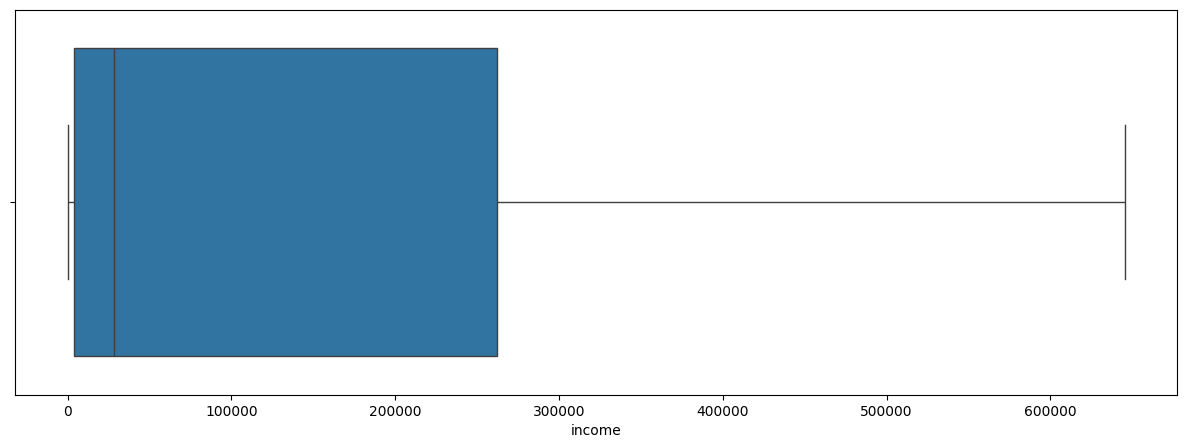

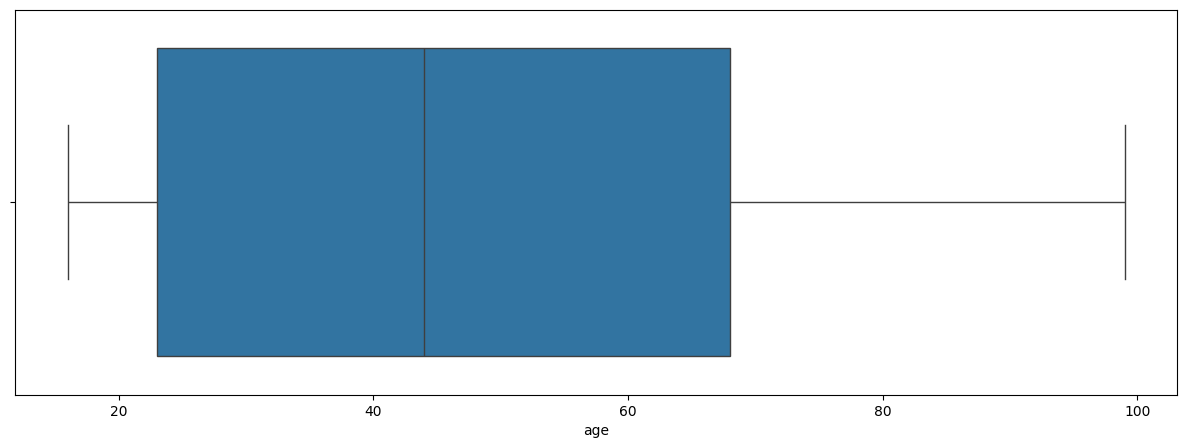

In [47]:
#boxplots
plt.figure(figsize=(15,5))
sns.boxplot(x=df['income'])

plt.figure(figsize=(15,5))
sns.boxplot(x=df['age'])

<Axes: title={'center': 'group'}, xlabel='date'>

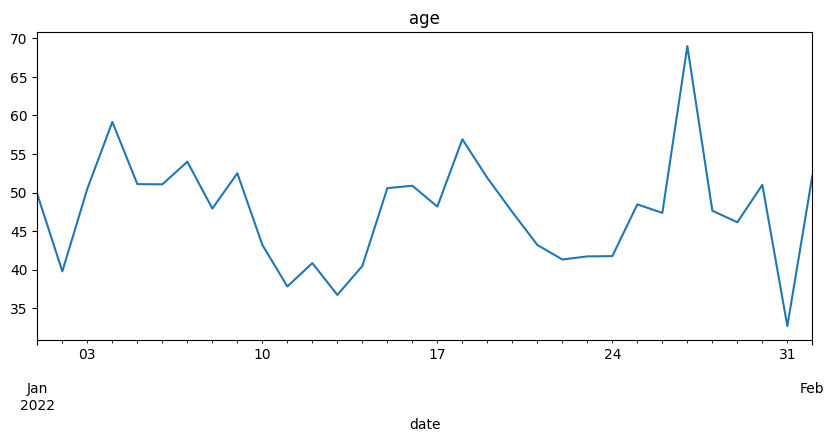

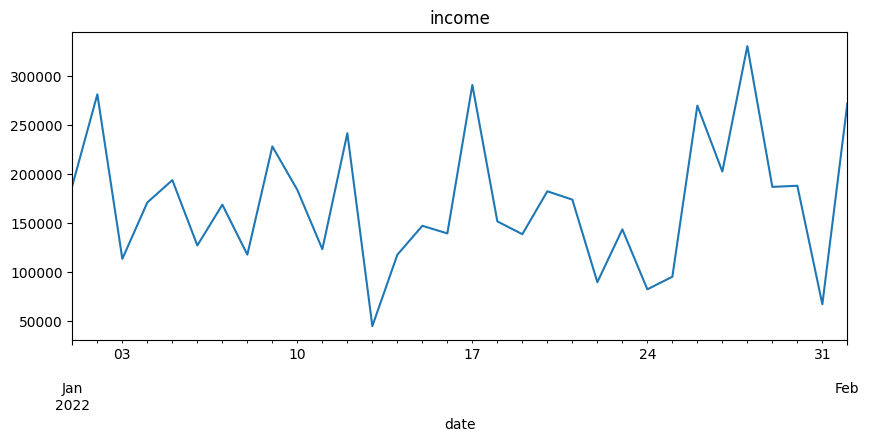

In [48]:
#resample
plt.figure(figsize=(10, 4))
df.resample('1d', on='date')['age'].mean().plot(title = 'age')
plt.figure(figsize=(10, 4))
df.resample('1d', on='date')['income'].mean().plot(title = 'income')
plt.figure(figsize=(10, 4))
df.resample('1d', on='date')['status'].nunique().plot(title = 'group')

In [49]:
age_df = pd.DataFrame()
age_df['age'] = df.resample('1d', on='date')['age'].mean()
age_df.reset_index(inplace=True)

In [50]:

plt.xlabel('date')
plt.ylabel('ages')
plt.scatter(age_df['date'].dt.day,age_df['age'],c='r')

In [51]:
income_df = pd.DataFrame()
income_df['income'] = df.resample('1d', on='date')['income'].mean()
income_df.reset_index(inplace=True)

plt.xlabel('date')
plt.ylabel('income')
plt.scatter(income_df['date'].dt.day,income_df['income'],c='r')

In [ ]:
#Теперь данные нормальные (я не уверена что нужно как-то обрезать дедов с 27 января)